In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy.sparse import csr_matrix
from scipy.spatial import distance
import os
import warnings; warnings.simplefilter('ignore')
import anndata
import scrublet as scr

import seaborn as sns
sns.set_style('white')

np.random.seed(0)
sc.settings.verbosity = 3 
sc.set_figure_params(scanpy=True, dpi=80)

In [2]:
sc.logging.print_versions()

scanpy==1.4.5 anndata==0.7.5 umap==0.3.10 numpy==1.17.2 scipy==1.5.2 pandas==1.1.2 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1


### 4A

In [3]:
adata = sc.read('veatch_cd8_orig4.h5ad')

In [4]:
adata = adata[(adata.obs['patient'] == 'X198') | (adata.obs['patient'] == 'X197')]

In [5]:
adata.obs['patient'].value_counts()

X197    1664
X198    1542
Name: patient, dtype: int64

In [6]:
sc.tl.pca(adata, random_state = 1010,svd_solver='arpack',use_highly_variable=False)
sc.pp.neighbors(adata, n_neighbors=20, n_pcs=20, random_state = 1010)
sc.tl.umap(adata, random_state = 1010, min_dist=0.2)
sc.tl.leiden(adata, resolution=0.7, random_state = 1010)

computing PCA with n_comps = 50
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 20


/Users/cshasha/opt/anaconda3/lib/python3.7/site-packages/scanpy/neighbors/__init__.py:104: DeprecationWarning: Use is_view instead of isview, isview will be removed in the future.
  if adata.isview:  # we shouldn't need this here...


    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:05)
running Leiden clustering
    finished: found 7 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


In [7]:
sc.set_figure_params(scanpy=True, dpi=80)

/Users/cshasha/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:4204: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  (isinstance(c, collections.Iterable) and


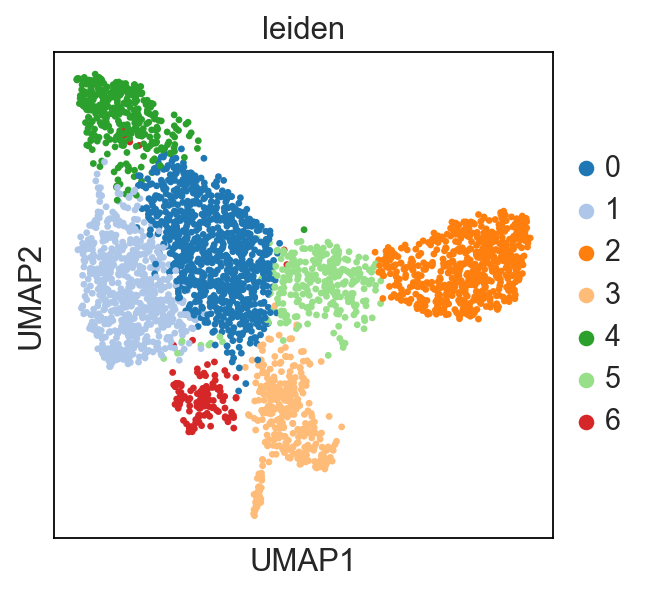

In [8]:
sc.pl.umap(adata, color='leiden',
           palette=sns.color_palette("tab20", 9),
           alpha = 1)

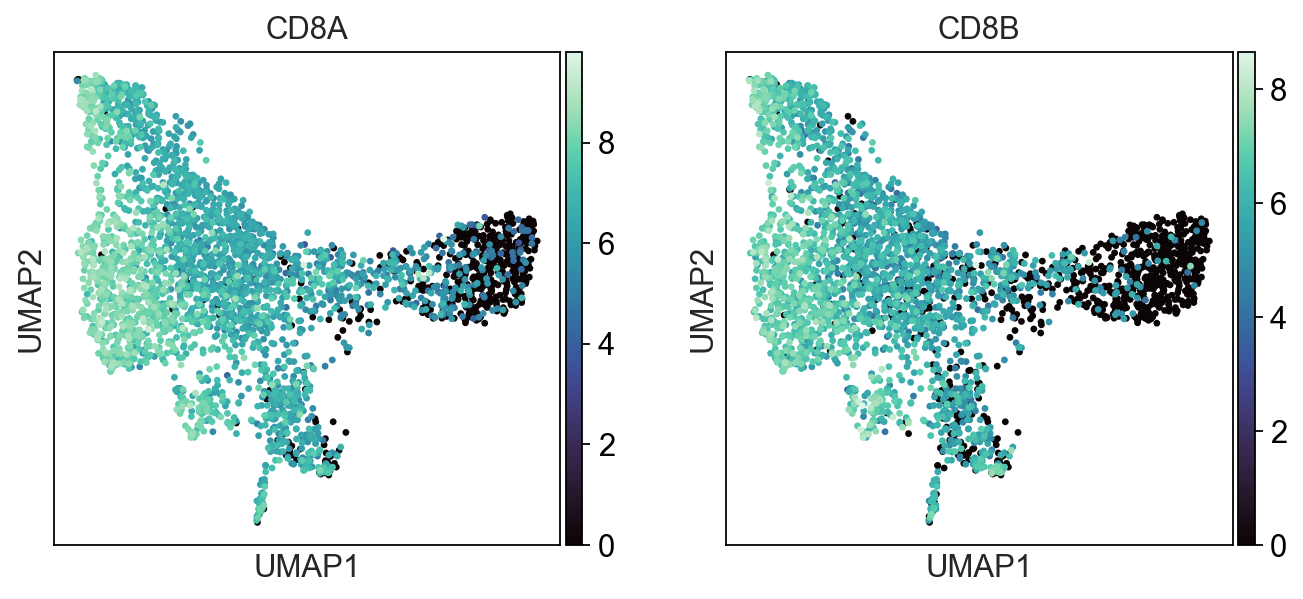

In [9]:
sc.pl.umap(adata, color=['CD8A','CD8B'],
           cmap='mako',vmin=0,
           alpha = 1)

In [10]:
adata = adata[adata.obs['leiden'] != '2']

In [11]:
sc.tl.pca(adata, random_state = 1010,svd_solver='arpack',use_highly_variable=False)
sc.pp.neighbors(adata, n_neighbors=20, n_pcs=20, random_state = 1010)
sc.tl.umap(adata, random_state = 1010, min_dist=0.2)
sc.tl.leiden(adata, resolution=0.7, random_state = 1010)

computing PCA with n_comps = 50
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 20


/Users/cshasha/opt/anaconda3/lib/python3.7/site-packages/scanpy/neighbors/__init__.py:104: DeprecationWarning: Use is_view instead of isview, isview will be removed in the future.
  if adata.isview:  # we shouldn't need this here...


    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)
running Leiden clustering
    finished: found 7 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


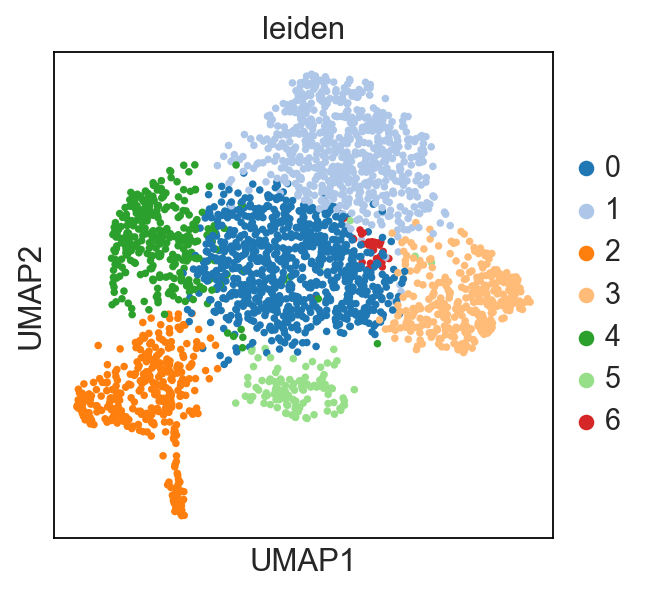

In [12]:
sc.pl.umap(adata, color='leiden',
           palette=sns.color_palette("tab20", 7),
           alpha = 1)

In [13]:
adata.obs['labels'] = 'CXCL13+ other'
adata.obs['labels'][adata.obs['leiden'] == '3'] = 'CXCL13+ TYMS+'
adata.obs['labels'][adata.obs['leiden'] == '5'] = 'CXCL13+ TCF7+'
adata.obs['labels'][adata.obs['leiden'] == '2'] = 'CXCL13-'

... storing 'labels' as categorical


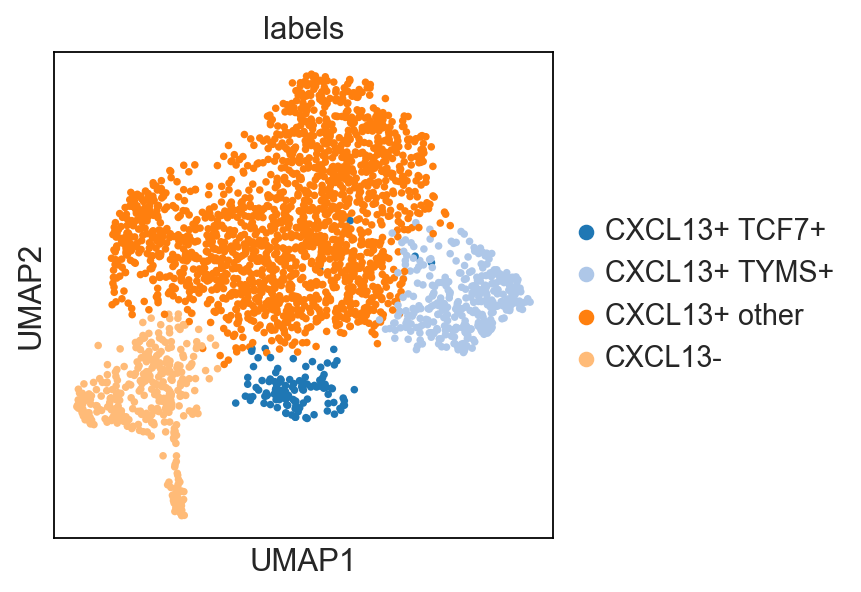

In [14]:
sc.pl.umap(adata, color='labels',
           palette=sns.color_palette("tab20", 4),
           alpha = 1)

### 4B

In [15]:
adata.obs['antigen_patient'] = 'nan'
adata.obs['antigen_patient'][(adata.obs['antigen'] == 'self') & (adata.obs['patient'] == 'X197')] = 'X197 self'
adata.obs['antigen_patient'][(adata.obs['antigen'] == 'neoantigen') & (adata.obs['patient'] == 'X198')] = 'X198 neoantigen'

... storing 'antigen_patient' as categorical


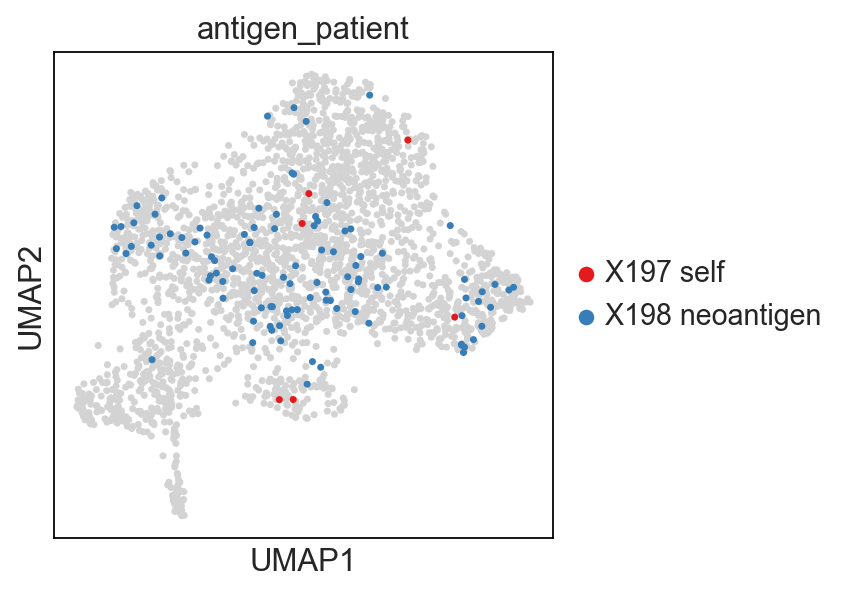

In [16]:
sc.pl.umap(adata, color='antigen_patient',
           palette=sns.color_palette('Set1',2),groups=['X197 self','X198 neoantigen'],
           s=40,alpha = 1)

### 4C

In [17]:
adata = sc.read('veatch_cd8_all20.h5ad')

In [18]:
sc.tl.pca(adata, random_state = 1010,svd_solver='arpack',use_highly_variable=False)
sc.pp.neighbors(adata, n_neighbors=20, n_pcs=20, random_state = 1010)
sc.tl.umap(adata, random_state = 1010, min_dist=0.2)
sc.tl.leiden(adata, resolution=0.7, random_state = 1010)

computing PCA with n_comps = 50
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 20


/Users/cshasha/opt/anaconda3/lib/python3.7/site-packages/scanpy/neighbors/__init__.py:104: DeprecationWarning: Use is_view instead of isview, isview will be removed in the future.
  if adata.isview:  # we shouldn't need this here...


    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:06)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:08)
running Leiden clustering
    finished: found 8 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:09)


In [19]:
genes = ['CXCL13', 'TYMS', 'TCF7', 'IL7R', 'GZMB']

In [20]:
ab = ['CD279 (ab)', 'CD103 (ab)', 'CD39 (ab)', 'Tim3 (ab)']

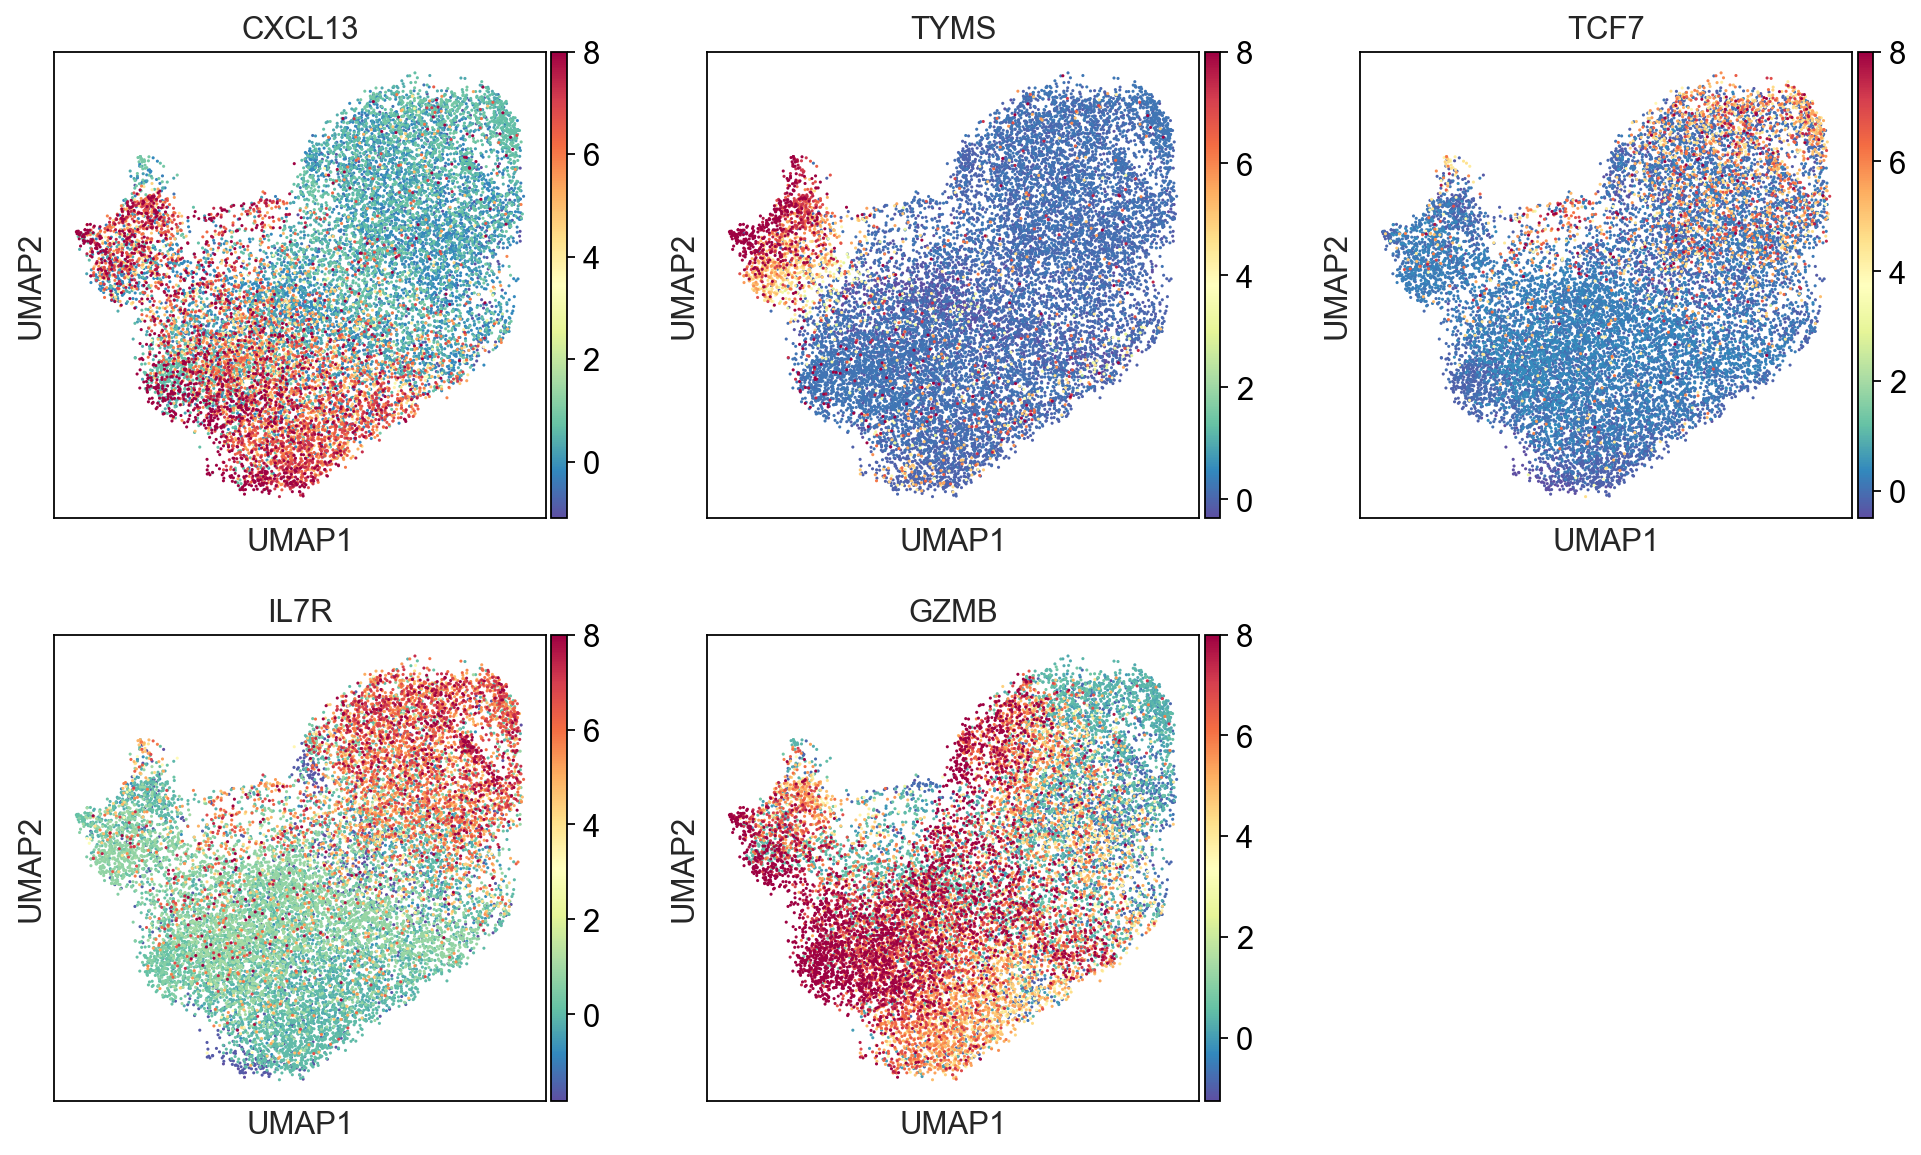

In [21]:
sc.pl.umap(adata, color=genes, vmax=8,
           alpha = 1,use_raw=False,ncols=3,cmap='Spectral_r')

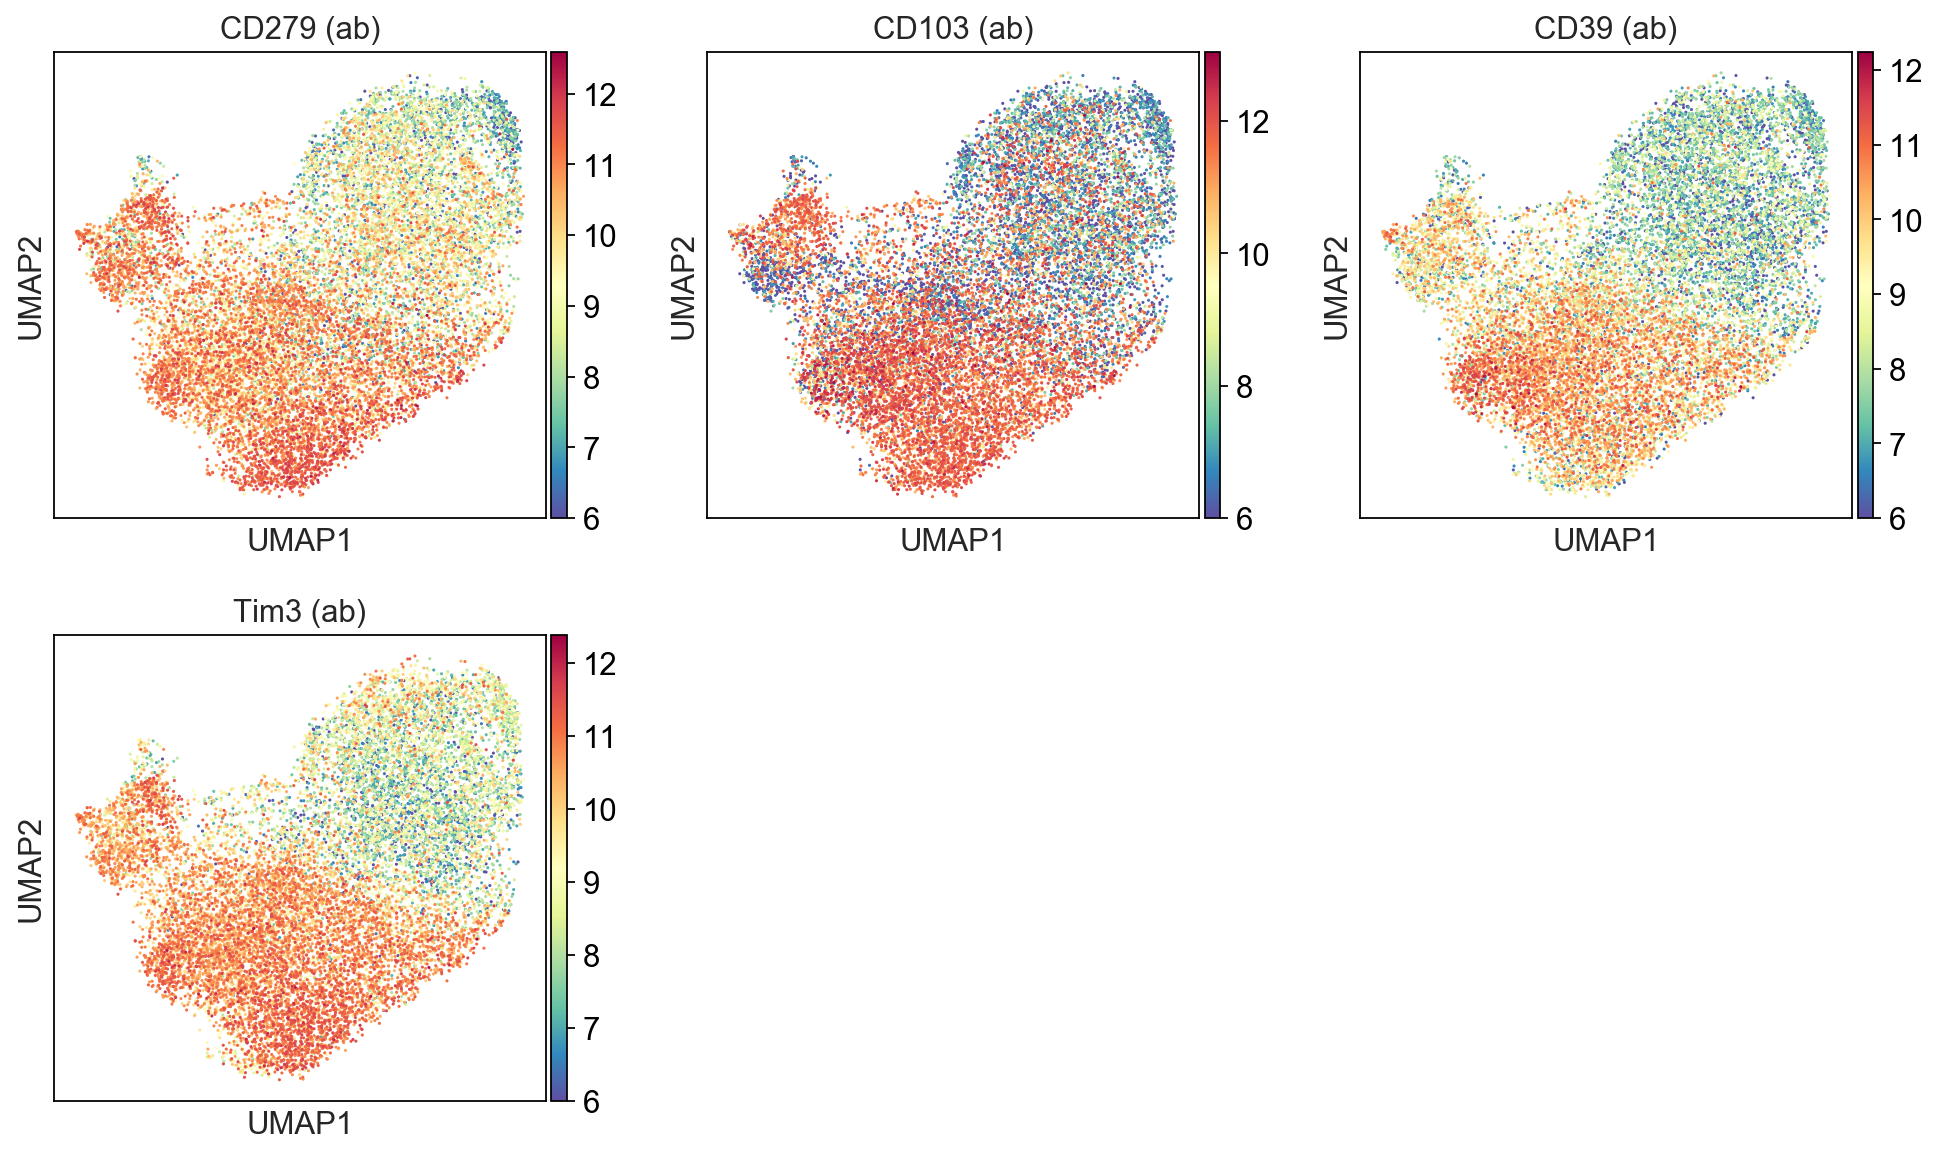

In [22]:
sc.pl.umap(adata, color=ab,vmin=6,
           alpha = 1,use_raw=False,ncols=3,cmap='Spectral_r')

### 4D

In [23]:
adata.obs['labels'] = 'CXCL13-'
adata.obs['labels'][adata.obs['leiden'] == '4'] = 'CXCL13+ TYMS+'
adata.obs['labels'][adata.obs['leiden'] == '7'] = 'CXCL13+ TCF7+'
adata.obs['labels'][(adata.obs['leiden'] == '1') | (adata.obs['leiden'] == '2')] = 'CXCL13+ TYMS-'

... storing 'labels' as categorical


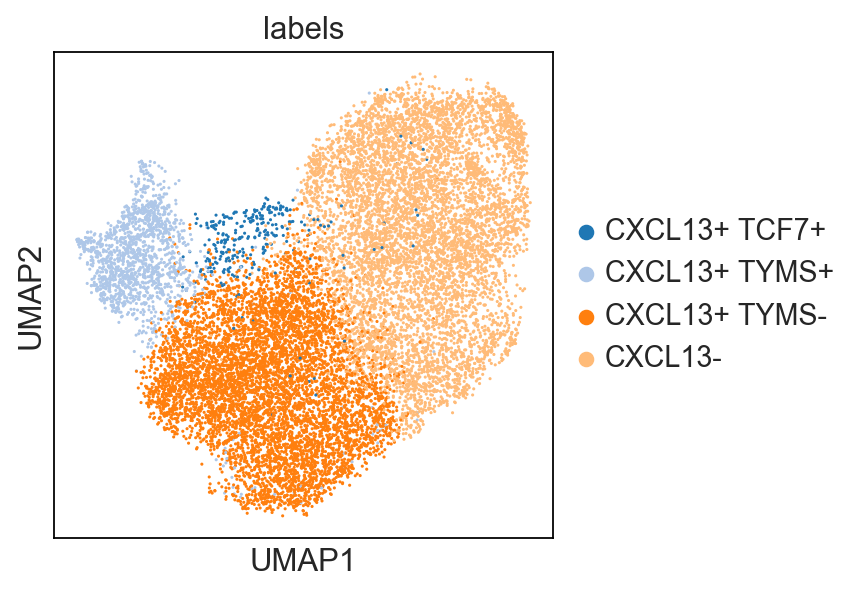

In [24]:
sc.pl.umap(adata, color='labels',
           palette=sns.color_palette("tab20", 20))